In [1]:
%pylab inline
import numpy as np
from matscipy.neighbours import neighbour_list
rdf_cutoff = 10.0
rdf_nbins = 100

Populating the interactive namespace from numpy and matplotlib


In [2]:
import ase.io as io
a = io.read('aC.cfg')

In [3]:
# Compute neighbor list and histogram of distances
r = neighbour_list('d', a, cutoff=rdf_cutoff)
rdf, bin_edges = np.histogram(r, bins=rdf_nbins, range=(0, rdf_cutoff))

# Normalize by bin volume and total number of atoms
rdf = rdf / (len(a) * 4*pi/3 * (bin_edges[1:]**3-bin_edges[:-1]**3))

# Normalize by density
rdf /= len(a)/a.get_volume()
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2

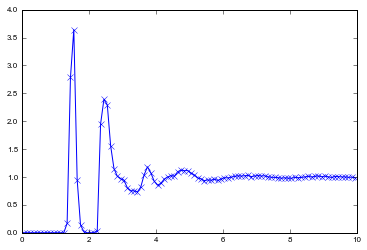

In [4]:
plot(bin_centers, rdf, 'x-')